<a href="https://colab.research.google.com/github/GOPIKA-S-S/RL/blob/main/2348518_lab10_RLipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Set Up Environment and Dependencies

In [ ]:
!pip install numpy gym tensorflow


In [ ]:
import numpy as np
import gym
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


/usr/local/lib/python3.10/dist-packages/tensorflow/lite/python/util.py:55: DeprecationWarning: jax.xla_computation is deprecated. Please use the AOT APIs; see https://jax.readthedocs.io/en/latest/aot.html. For example, replace xla_computation(f)(*xs) with jit(f).lower(*xs).compiler_ir('hlo'). See CHANGELOG.md for 0.4.30 for more examples.
  from jax import xla_computation as _xla_computation


Create the Policy Network

In [ ]:
import numpy as np
import gym
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

class PolicyNetwork(keras.Model):
    def __init__(self, state_dim, action_dim):
        super(PolicyNetwork, self).__init__()
        self.dense1 = layers.Dense(24, activation='relu', input_shape=(state_dim,))
        self.dense2 = layers.Dense(24, activation='relu')
        self.output_layer = layers.Dense(action_dim, activation='softmax')

    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dense2(x)
        return self.output_layer(x)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Define the REINFORCE Algorithm

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
class REINFORCEAgent:
    def __init__(self, state_dim, action_dim, learning_rate=0.01):
        self.policy_network = PolicyNetwork(state_dim, action_dim)
        self.optimizer = keras.optimizers.Adam(learning_rate)

    def choose_action(self, state):
        state = state.reshape([1, -1])  # reshaping for the model
        action_probs = self.policy_network(state).numpy()[0]
        action = np.random.choice(len(action_probs), p=action_probs)
        return action, action_probs[action]

    def train(self, trajectories):
        for states, actions, rewards in trajectories:
            discounted_rewards = self.discount_rewards(rewards)

            # Convert to numpy arrays for the model
            states = np.array(states)
            actions = np.array(actions)
            discounted_rewards = np.array(discounted_rewards)

            with tf.GradientTape() as tape:
                action_probs = self.policy_network(states)  # [batch_size, action_dim]

                # Get the log probability of the actions taken
                neg_log_prob = -tf.math.log(action_probs.numpy()[range(len(actions)), actions])
                loss = tf.reduce_mean(neg_log_prob * discounted_rewards)

            grads = tape.gradient(loss, self.policy_network.trainable_variables)
            self.optimizer.apply_gradients(zip(grads, self.policy_network.trainable_variables))

    def discount_rewards(self, rewards, gamma=0.99):
        discounted = np.zeros_like(rewards)
        running_add = 0
        for t in reversed(range(len(rewards))):
            running_add = running_add * gamma + rewards[t]
            discounted[t] = running_add
        return discounted


 Train the Agent in an Environment

In [ ]:
def train_agent(episodes=1000):
    env = gym.make('CartPole-v1', new_step_api=True)
    state_dim = env.observation_space.shape[0]
    action_dim = env.action_space.n

    agent = REINFORCEAgent(state_dim, action_dim)

    total_rewards = []

    for episode in range(episodes):
        state, info = env.reset(return_info=True)  # Use return_info=True to get additional info
        states, actions, rewards = [], [], []

        done = False
        while not done:
            action, prob = agent.choose_action(state)
            next_state, reward, terminated, truncated, info = env.step(action)

            states.append(state)
            actions.append(action)
            rewards.append(reward)

            state = next_state
            done = terminated or truncated

        total_reward = sum(rewards)
        total_rewards.append(total_reward)
        agent.train([(states, actions, rewards)])

        if episode % 100 == 0:
            print(f"Episode {episode}: Total Reward: {total_reward}")

    env.close()

    # Plot total rewards per episode
    plt.plot(total_rewards)
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.title('Total Reward per Episode')
    plt.show()

train_agent()


ValueError: No gradients provided for any variable.

Streaming output truncated to the last 5000 lines.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step

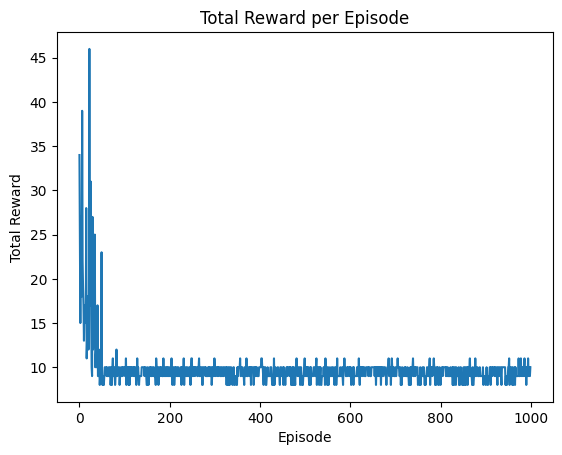

In [ ]:
import gym
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

class PolicyGradientAgent:
    def __init__(self, state_dim, action_dim, learning_rate=0.01):
        self.state_dim = state_dim
        self.action_dim = action_dim
        self.learning_rate = learning_rate
        self.model = self.build_model()

    def build_model(self):
        model = keras.Sequential([
            keras.layers.Dense(24, activation='relu', input_shape=(self.state_dim,)),
            keras.layers.Dense(24, activation='relu'),
            keras.layers.Dense(self.action_dim, activation='softmax')
        ])
        model.compile(optimizer=keras.optimizers.Adam(learning_rate=self.learning_rate), loss=self.loss)
        return model

    def loss(self, y_true, y_pred):
        # Negative log likelihood
        return -tf.reduce_mean(tf.reduce_sum(y_true * tf.math.log(y_pred + 1e-10), axis=1))

    def choose_action(self, state):
        state = np.reshape(state, [1, self.state_dim])
        action_probs = self.model.predict(state).flatten()
        action = np.random.choice(self.action_dim, p=action_probs)
        return action, action_probs[action]

    def train(self, episode_data):
        states, actions, rewards = zip(*episode_data)
        discounted_rewards = self.compute_discounted_rewards(rewards)

        # One-hot encode the actions
        one_hot_actions = np.zeros((len(actions), self.action_dim))
        one_hot_actions[np.arange(len(actions)), actions] = 1

        # Train the model
        self.model.fit(np.array(states), one_hot_actions, sample_weight=np.array(discounted_rewards), verbose=0)

    def compute_discounted_rewards(self, rewards, gamma=0.99):
        discounted_rewards = np.zeros_like(rewards)
        cumulative = 0
        for t in reversed(range(len(rewards))):
            cumulative = cumulative * gamma + rewards[t]
            discounted_rewards[t] = cumulative
        return discounted_rewards

def train_agent(episodes=1000):
    env = gym.make('CartPole-v1', new_step_api=True)
    state_dim = env.observation_space.shape[0]
    action_dim = env.action_space.n

    agent = PolicyGradientAgent(state_dim, action_dim)
    total_rewards = []

    for episode in range(episodes):
        state = env.reset()
        done = False
        episode_data = []
        total_reward = 0

        while not done:
            action, _ = agent.choose_action(state)
            next_state, reward, terminated, truncated, info = env.step(action)
            total_reward += reward

            episode_data.append((state, action, reward))
            state = next_state
            done = terminated or truncated

        total_rewards.append(total_reward)
        agent.train(episode_data)

        if episode % 100 == 0:
            print(f"Episode {episode}: Total Reward: {total_reward}")

    env.close()

    # Plot total rewards per episode
    plt.plot(total_rewards)
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.title('Total Reward per Episode')
    plt.show()

# Run the training agent
train_agent()
